In [173]:
from pylab import mpl, plt
plt.style.use(plt.style.available[11])
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [174]:
from tvDatafeed import TvDatafeed, Interval
username = ''
password = ''

tvl = TvDatafeed(username, password)

ERROR:tvDatafeed.main:error while signin


In [175]:
ticker = 'HCLTECH'
data=tvl.get_hist(ticker, 'NSE', interval=Interval.in_1_hour, n_bars=300000, fut_contract=None, extended_session=False)

<Axes: title={'center': 'close for HCLTECH'}, xlabel='datetime'>

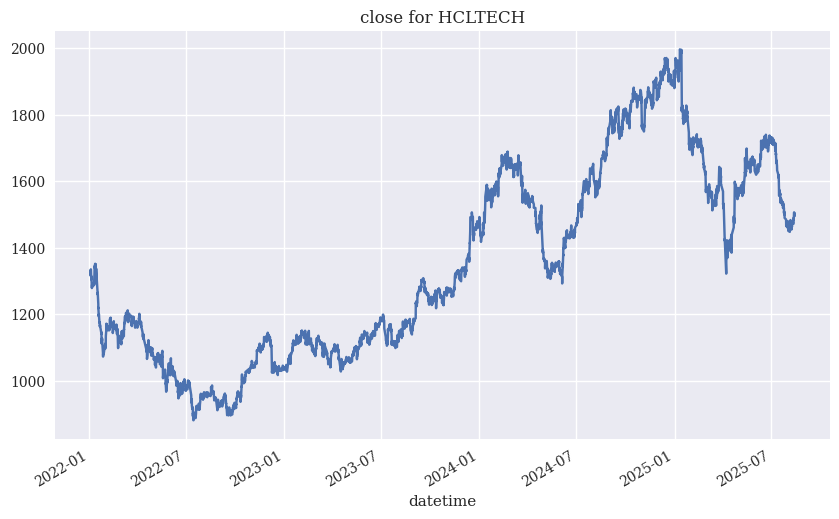

In [176]:
data['close'].plot(figsize=(10, 6), title=f'close for {ticker}')

In [177]:
data['returns'] = (data['close'] - data['close'].shift(1))/data['close'].shift(1)
data.tail(10)

,symbol,open,high,low,close,volume,returns
datetime,,,,,,,
2025-08-12 12:15:00,NSE:HCLTECH,1504.9,1508.4,1500.0,1501.4,534754.0,-0.002326
2025-08-12 13:15:00,NSE:HCLTECH,1501.5,1504.9,1500.0,1501.8,373814.0,0.000266
2025-08-12 14:15:00,NSE:HCLTECH,1501.6,1502.4,1498.5,1499.7,838051.0,-0.001398
2025-08-12 15:15:00,NSE:HCLTECH,1499.6,1499.8,1495.4,1498.0,252426.0,-0.001134
2025-08-13 09:15:00,NSE:HCLTECH,1504.3,1504.3,1491.6,1499.6,257207.0,0.001068
2025-08-13 10:15:00,NSE:HCLTECH,1499.4,1501.8,1496.4,1499.3,401717.0,-0.000200
2025-08-13 11:15:00,NSE:HCLTECH,1499.3,1500.2,1489.0,1495.9,437283.0,-0.002268
2025-08-13 12:15:00,NSE:HCLTECH,1495.9,1502.1,1495.9,1501.1,322431.0,0.003476
2025-08-13 13:15:00,NSE:HCLTECH,1501.1,1503.8,1498.9,1503.1,415327.0,0.001332


In [178]:
returns = data['returns']

<Axes: >

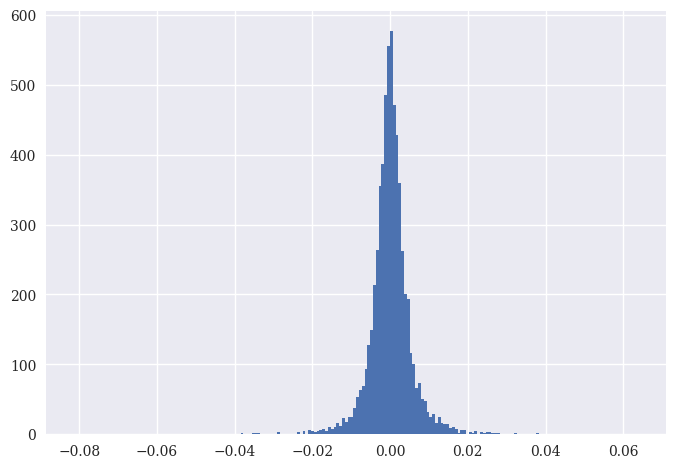

In [179]:
returns.hist(bins=200)

<Axes: >

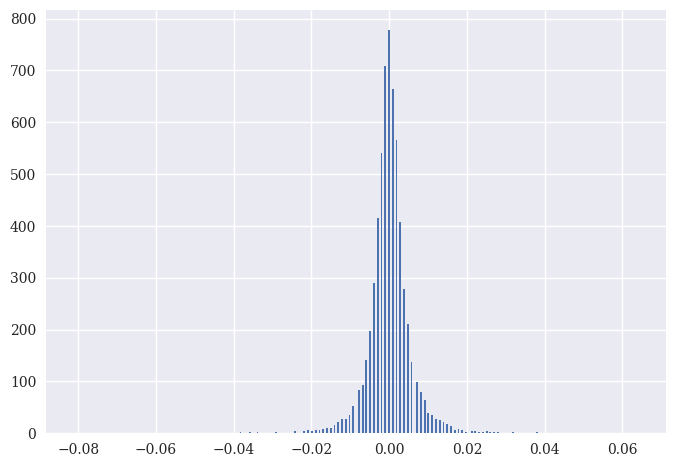

In [180]:
returns.round(3).hist(bins=300)

In [181]:
returns = returns.dropna()
returns

datetime
2022-01-03 10:15:00    0.003014
2022-01-03 11:15:00   -0.004508
2022-01-03 12:15:00    0.002830
2022-01-03 13:15:00   -0.000941
2022-01-03 14:15:00   -0.000264
                         ...   
2025-08-13 10:15:00   -0.000200
2025-08-13 11:15:00   -0.002268
2025-08-13 12:15:00    0.003476
2025-08-13 13:15:00    0.001332
2025-08-13 14:15:00   -0.000466
Name: returns, Length: 6260, dtype: float64

In [182]:
returns = returns.round(3)

In [183]:
returns = returns.to_list()

In [184]:
min(returns), max(returns)

(-0.081, 0.064)

In [185]:
import numpy as np
zeros = np.zeros((int(1000*(max(returns) - min(returns))) + 1, int(1000*(max(returns) - min(returns))) + 1))

In [186]:
for i in range(int(1000*min(returns)), int(1000*max(returns)) + 1):
    print(i)

-81
-80
-79
-78
-77
-76
-75
-74
-73
-72
-71
-70
-69
-68
-67
-66
-65
-64
-63
-62
-61
-60
-59
-58
-57
-56
-55
-54
-53
-52
-51
-50
-49
-48
-47
-46
-45
-44
-43
-42
-41
-40
-39
-38
-37
-36
-35
-34
-33
-32
-31
-30
-29
-28
-27
-26
-25
-24
-23
-22
-21
-20
-19
-18
-17
-16
-15
-14
-13
-12
-11
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


In [187]:
import pandas as pd
t_matrix = pd.DataFrame(zeros, [i for i in range(int(1000*min(returns)), int(1000*max(returns)) + 1)], [i for i in range(int(1000*min(returns)), int(1000*max(returns)) + 1)])

In [188]:
for i in range(len(returns)-1):
    curr = int (1000*returns[i])
    next = int (1000*returns[i+1])
    t_matrix.loc[curr, next] += 1

In [199]:
sums = t_matrix.sum()
t_matrix = t_matrix.T
for i in t_matrix.columns:
    t_matrix[i] = t_matrix[i]/sums[i]
t_matrix = t_matrix.T

<Axes: >

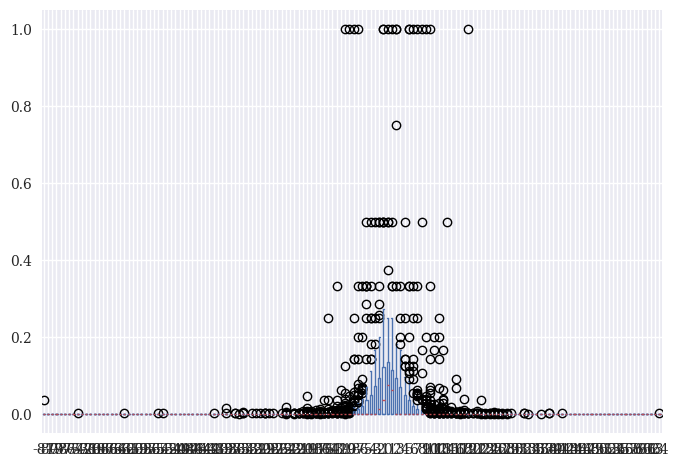

In [210]:
t_matrix.plot(kind='box')

<Axes: >

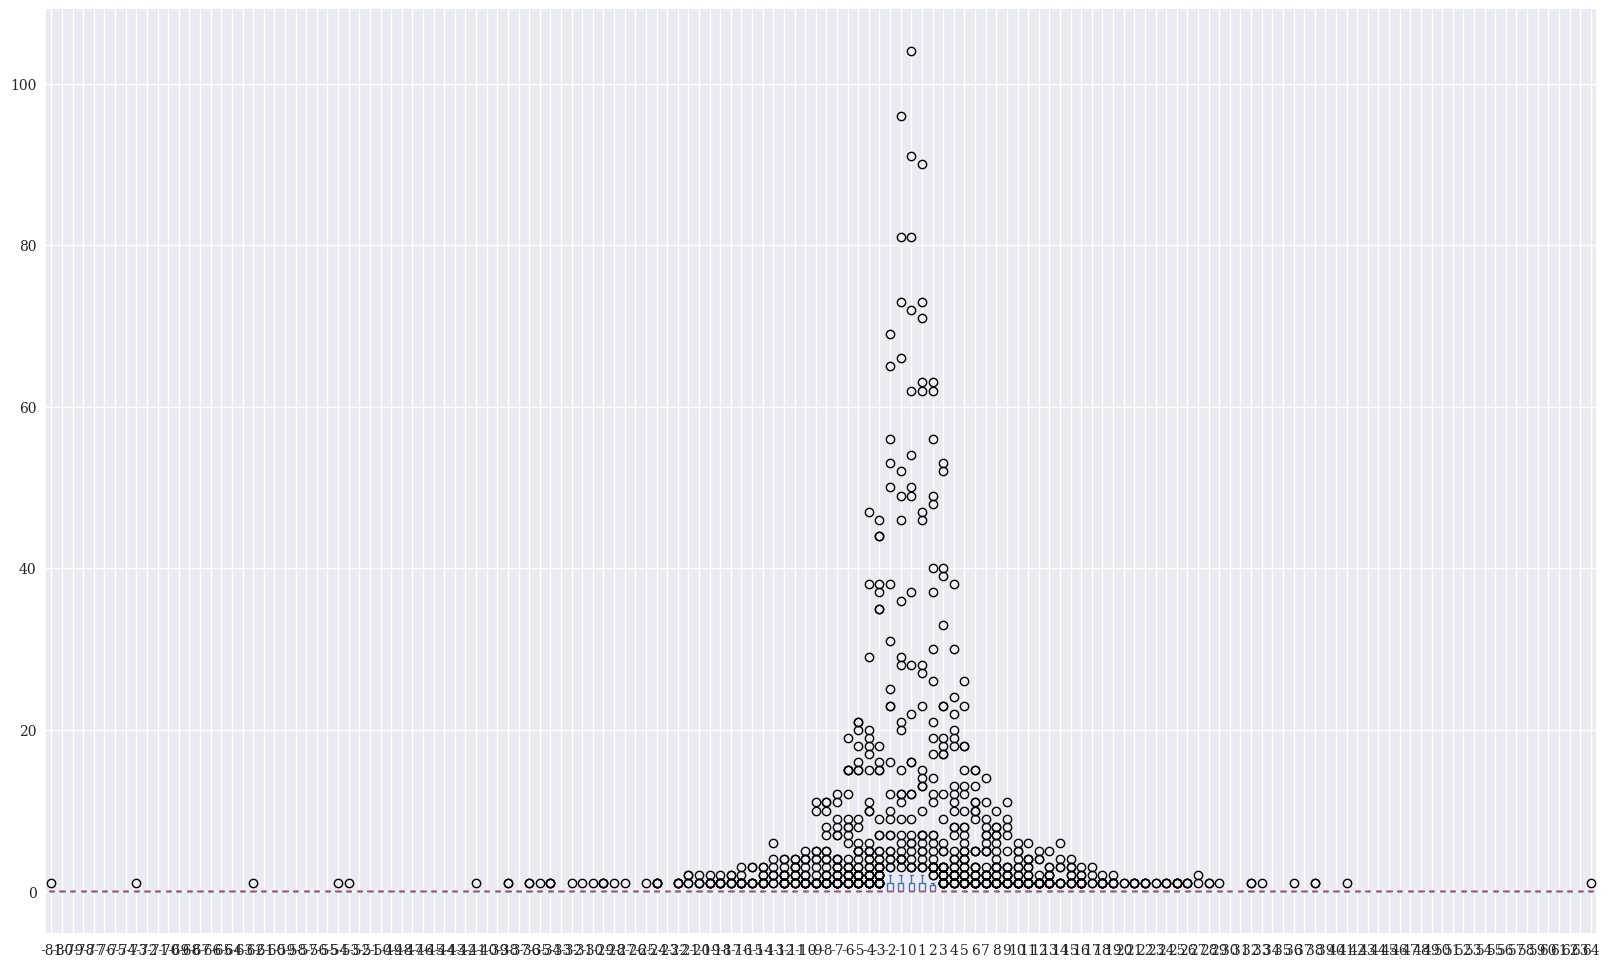

In [189]:
t_matrix.plot(kind='box', figsize=(20, 12))

In [211]:
t_matrix

,-81,-80,-79,-78,-77,-76,-75,-74,-73,-72,...,55,56,57,58,59,60,61,62,63,64
-81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
t_matrix.sum()

-81    0.000959
-80    0.000000
-79    0.000000
-78    0.000000
-77    0.000000
         ...   
 60    0.000000
 61    0.000000
 62    0.000000
 63    0.000000
 64    0.000959
Length: 146, dtype: float64

In [154]:
t_matrix

,-81,-80,-79,-78,-77,-76,-75,-74,-73,-72,...,55,56,57,58,59,60,61,62,63,64
-81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
-80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
-79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
-78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
-77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00032,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [223]:
def t_matrix_maker(ticker):
    data=tvl.get_hist(ticker, 'NSE', interval=Interval.in_1_hour, n_bars=300000, fut_contract=None, extended_session=False)
    data['returns'] = (data['close'] - data['close'].shift(1))/data['close'].shift(1)
    returns = data['returns']
    returns = returns.dropna()
    returns = returns.round(2)
    returns = returns.to_list()
    zeros = np.zeros((int(100*(max(returns) - min(returns))) + 1, int(100*(max(returns) - min(returns))) + 1))
    t_matrix = pd.DataFrame(zeros, [i for i in range(int(100*min(returns)), int(100*max(returns)) + 1)], [i for i in range(int(100*min(returns)), int(100*max(returns)) + 1)])
    
    for i in range(len(returns)-1):
        curr = int (100*returns[i])
        next = int (100*returns[i+1])
        t_matrix.loc[curr, next] += 1

    sums = t_matrix.sum()
    t_matrix = t_matrix.T
    for i in t_matrix.columns :
        if sums[i] != 0:
            t_matrix[i] = t_matrix[i]/sums[i]
    t_matrix = t_matrix.T

    return t_matrix

In [224]:
hdfc_t_matrix = t_matrix_maker('HDFCBANK')

In [226]:
hdfc_t_matrix.T.sum()

-6     1.0
-5     1.0
-4     1.0
-3     1.0
-2     1.0
-1     1.0
 0     1.0
 1     1.0
 2     1.0
 3     1.0
 4     1.0
 5     0.0
 6     0.0
 7     0.0
 8     0.0
 9     0.0
 10    0.0
 11    0.0
 12    0.0
 13    1.0
dtype: float64